## Importing Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## Define Function

### Modified Secant

In [18]:
def mod_secant(f, a, delta, e, N=100):
    """
    Modified Secant method for finding roots of a function.

    Parameters
    ----------
    f : function
        The function to find the root of.
    a : float
        The lower bound of the initial interval.
    delta : float
        The upper bound of the initial interval.
    e : float
        The desired accuracy of the root.
    N : int, optional
        The maximum number of iterations. Default is 100.

    Returns
    -------
    float
        The root of the function.

    Notes
    ------
    The secant method is a root-finding algorithm that uses the slope of the
    function at two points to approximate the root. The algorithm starts with
    an interval [a, b] containing the root, and uses the slope of the function
    at a and b to approximate the root. The algorithm iterates until the
    desired accuracy is reached or the maximum number of iterations is reached.

    """
    print(f"{'Iterasi':>8} | {'xi-1':>20} | {'xi+1':>20} | {'error':>20}")
    print("-" * 80)
    step = 1
    condition = True
    while condition:
        if f(a + delta) == f(a):
            print("Divide by zero error!")
            break

        m = a - delta * f(a) / (f(a + delta) - f(a))
        error = abs(m - a) / abs(m)
        print(f"{step:>8} | {a:>20} | {m:>20} | {error:>20}")
        a = m
        step = step + 1

        if step > N:
            print("Not Convergent!")
            break

        condition = error > e

    return m

### Gauss Jordan

In [19]:
def gauss_jordan(A):
    """
    Solves a system of linear equations using Gaussian elimination with partial pivoting.

    Parameters
    ----------
    A : ndarray of shape (n, n+1)
        The input matrix, where each row represents an equation and each column represents a variable plus one column for the solution.

    Returns
    -------
    ndarray of shape (n,)
        The solution to the system of equations.
    """
    n = A.shape[0]

    for i in range(n):
        A[i] = A[i] / A[i][i]
        for j in range(n):
            if i != j:
                A[j] = A[j] - A[i] * A[j][i]

    return A[:, -1]

In [20]:
def linear_regression(x, y):
    """
    Compute the parameters of the linear regression line between two arrays x and y.

    Parameters
    ----------
    x : array_like
        The independent variable.
    y : array_like
        The dependent variable.

    Returns
    -------
    a : array_like
        The parameters of the linear regression line (a_0 and a_1).
    Sy : float
        The sample standard deviation of y.
    Syx : float
        The sample standard deviation of y from the regression line.
    r2 : float
        The coefficient of determination.
    r : float
        The correlation coefficient.
    y_hat : array_like
        The estimated y values based on the linear regression equation.
    """
    n = np.size(x)

    # Find the value of a_0 and a_1
    a_0 = (np.sum(x**2) * np.sum(y) - np.sum(x) * np.sum(x * y)) / (
        n * np.sum(x**2) - np.sum(x) ** 2
    )
    a_1 = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (
        n * np.sum(x**2) - np.sum(x) ** 2
    )

    # Find the value of y_hat or predicted y
    y_bar = np.mean(y)
    y_hat = a_0 + a_1 * x

    # Find the value of Sy, Syx, r2, and r
    Sy = np.sqrt(np.sum((y - y_bar) ** 2) / (n - 1))
    Syx = np.sqrt((np.sum((y - y_hat) ** 2)) / (n - 2))
    r2 = (Sy**2 - Syx**2) / Sy**2
    r = np.sqrt(r2)

    return [a_0, a_1], Sy, Syx, r2, r, y_hat

### Polynomial Regression

In [21]:
def polynomial_regression(x, y):
    """
    Fits a second order polynomial to data and calculates the regression statistics.

    Parameters
    ----------
    x : array_like
        Independent variable.
    y : array_like
        Dependent variable.

    Returns
    -------
    polynom_coef : array_like
        Coefficients of the fitted polynomial.
    Sy : float
        Sample standard deviation of y.
    Syx : float
        Sample standard deviation of y conditional on x.
    r2 : float
        Coefficient of determination.
    r : float
        Coefficient of correlation.
    y_hat : array_like
        Predicted values of y.
    """
    n = np.size(x)

    # Make the Polynomial Matrix
    y_bar = np.mean(y)
    A_hat = np.zeros((3, 3))
    b_hat = np.zeros((3, 1))

    for i in range(3):
        b_hat[i][0] = np.sum(y * x**i)
        for j in range(3):
            count = i + j
            if i + j == 0:
                A_hat[i][j] = len(x)
                continue
            A_hat[i][j] = np.sum(x**count)

    # Solve the system of linear equations
    A_tilde = np.column_stack((A_hat, b_hat))
    polynom_coef = gauss_jordan(A_tilde)

    # Find the value of y_hat or predicted y
    y_hat = polynom_coef[0] + polynom_coef[1] * x + polynom_coef[2] * x**2

    # Find the value of Sy, Syx, r2, and r
    Sy = np.sqrt(np.sum((y - y_bar) ** 2) / (n - 1))
    Syx = np.sqrt((np.sum((y - y_hat) ** 2)) / (n - 3))
    r2 = (Sy**2 - Syx**2) / Sy**2
    r = np.sqrt(r2)

    return polynom_coef, Sy, Syx, r2, r, y_hat

### Exponential Regression

In [22]:
def exp_regression(x, y, f): # using modified secant method
    """
    Compute the parameters of the exponential regression line between two arrays x and y.

    Parameters
    ----------
    x : array_like
        The independent variable.
    y : array_like
        The dependent variable.
    f : callable
        The function to use for the secant method.

    Returns
    -------
    a : array_like
        The parameters of the exponential regression line (a_0 and a_1).
    Sy : float
        The sample standard deviation of y.
    Syx : float
        The sample standard deviation of y from the regression line.
    r2 : float
        The coefficient of determination.
    r : float
        The correlation coefficient.
    y_hat : array_like
        The estimated y values based on the exponential regression equation.
    """
    n = np.size(x)

    # Find the value of a_0 and a_1 using modified secant method
    a_1 = mod_secant(f, 0, 0.01, 0.001)
    a_0 = np.sum(y*np.exp(a_1*x)) / np.sum(np.exp(2*a_1*x))

    # Find the value of y_hat or predicted y
    y_bar = np.mean(y)
    y_hat = a_0 * np.exp(a_1 * x)

    # Find the value of Sy, Syx, r2, and r
    Sy = np.sqrt(np.sum((y - y_bar) ** 2) / (n - 1))
    Syx = np.sqrt((np.sum((y - y_hat) ** 2)) / (n - 2))
    r2 = (Sy**2 - Syx**2) / Sy**2
    r = np.sqrt(r2)

    return [a_0, a_1], Sy, Syx, r2, r, y_hat

## Define Data

In [23]:
A = np.linspace(0, 20, 6) # days 
b = np.array([67, 84, 98, 125, 149, 185]) # cell count x 10^6

## Linear Regression

In [24]:
linear_const, Sy, Syx, r2, r, y_hat_linear = linear_regression(A, b)

print(f'Intercept = {linear_const[0]}')
print(f'Slope = {linear_const[1]}')
print(f'Standard Deviation = {Sy:.4f}')
print(f'Error = {Syx:.4f}')
print(f'R^2 = {r2:.4%}')
print(f'R = {r:.4%}')

Intercept = 60.0
Slope = 5.8
Standard Deviation = 43.9454
Error = 7.6942
R^2 = 96.9345%
R = 98.4553%


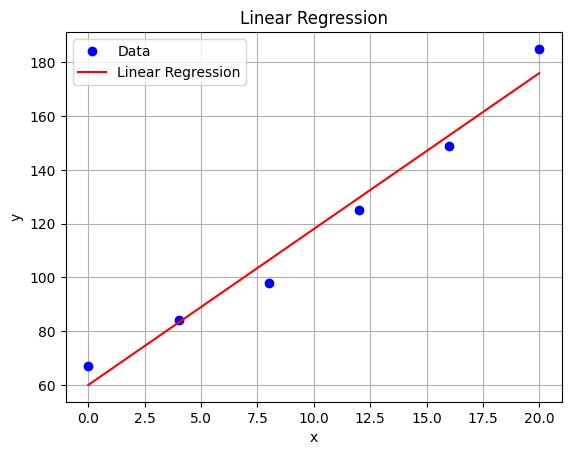

In [25]:
plt.plot(A, b, 'bo')
plt.plot(A, y_hat_linear, 'r-')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data', 'Linear Regression'])
plt.grid()
plt.show()

## Polynomial Regression

In [26]:
polynom_coef, Sy, Syx, r2, r, y_hat_polynom = polynomial_regression(A, b)

print(f'Ceofficient 1 = {polynom_coef[0]:.4f}')
print(f'Coefficient 2 = {polynom_coef[1]:.4f}')
print(f'Coefficient 3 = {polynom_coef[2]:.4f}')
print(f'Standard Deviation = {Sy:.4f}')
print(f'Error = {Syx:.4f}')
print(f'R^2 = {r2:.4%}')
print(f'R = {r:.4%}')

Ceofficient 1 = 68.0357
Coefficient 2 = 2.7866
Coefficient 3 = 0.1507
Standard Deviation = 43.9454
Error = 2.5714
R^2 = 99.6576%
R = 99.8287%


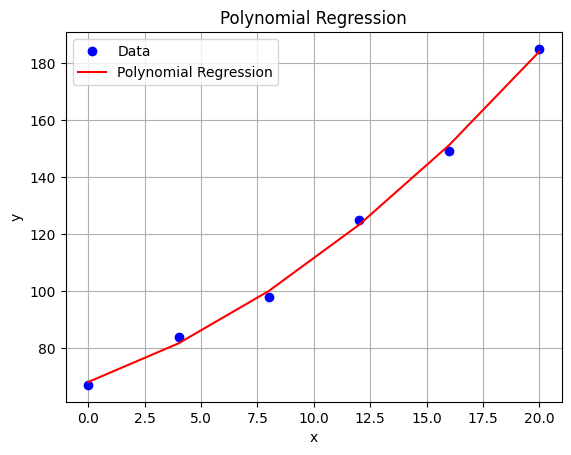

In [27]:
plt.plot(A, b, 'bo')
plt.plot(A, y_hat_polynom, 'r-')
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data', 'Polynomial Regression'])
plt.grid()
plt.show()

## Exponential Regression

In [28]:
def exp_func(c):
    sum_yx_exp_cx = np.sum(b * A * np.exp(c * A))
    sum_y_exp_cx = np.sum(b * np.exp(c * A))
    sum_exp_2cx = np.sum(np.exp(2 * c * A))
    sum_x_exp_2cx = np.sum(A * np.exp(2 * c * A))

    second_term = (sum_y_exp_cx / sum_exp_2cx) * sum_x_exp_2cx

    result = sum_yx_exp_cx - second_term
    return result

In [29]:
exponent_coef, Sy, Syx, r2, r, y_hat_exponent = exp_regression(A, b, exp_func)

print(f'\nCeofficient 1 = {exponent_coef[0]:.4f}')
print(f'Coefficient 2 = {exponent_coef[1]:.4f}')
print(f'Standard Deviation = {Sy:.4f}')
print(f'Error = {Syx:.4f}')
print(f'R^2 = {r2:.4%}')
print(f'R = {r:.4%}')

 Iterasi |                 xi-1 |                 xi+1 |                error
--------------------------------------------------------------------------------
       1 |                    0 |   0.0872104706097866 |                  1.0
       2 |   0.0872104706097866 | 0.058461571820005165 |  0.49175719869960366
       3 | 0.058461571820005165 |  0.05129592253170745 |   0.1396923758193144
       4 |  0.05129592253170745 |  0.05053611439953435 | 0.015034953541661695
       5 |  0.05053611439953435 | 0.050485460655024905 | 0.0010033333132398233
       6 | 0.050485460655024905 |  0.05048230502347443 | 6.250965658182495e-05

Ceofficient 1 = 67.1554
Coefficient 2 = 0.0505
Standard Deviation = 43.9454
Error = 2.0445
R^2 = 99.7836%
R = 99.8917%


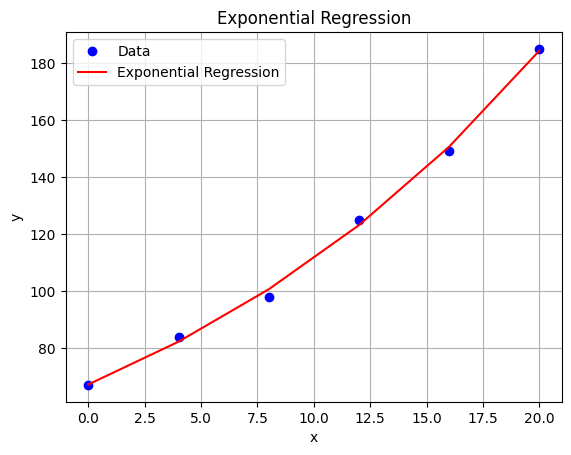

In [30]:
plt.plot(A, b, 'bo')
plt.plot(A, y_hat_exponent, 'r-')
plt.title('Exponential Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data', 'Exponential Regression'])
plt.grid()
plt.show()

## Summary

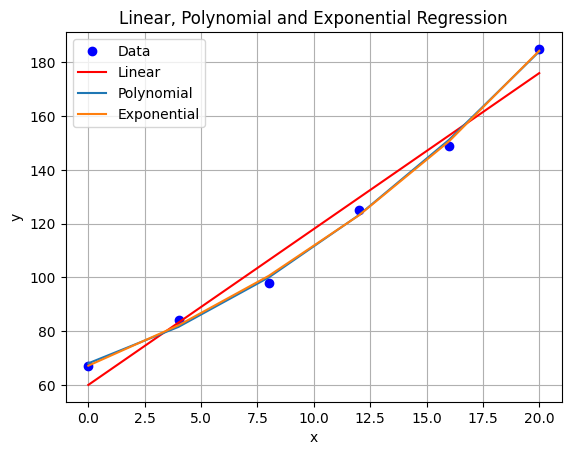

In [31]:
plt.plot(A, b, 'bo')
plt.plot(A, y_hat_linear, 'r')
plt.plot(A, y_hat_polynom)
plt.plot(A, y_hat_exponent)
plt.title('Linear, Polynomial and Exponential Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data', 'Linear', 'Polynomial', 'Exponential'])
plt.grid()
plt.show()

In [32]:
y_predict_linear = linear_const[0] + linear_const[1] * 40
y_predict_polynom = polynom_coef[0] + polynom_coef[1] * 40 + polynom_coef[2] * 40**2
y_predict_exponent = exponent_coef[0] * np.exp(exponent_coef[1] * 40)
print(f'Linear: {y_predict_linear:.4f}')
print(f'Polynom: {y_predict_polynom:.4f}')
print(f'Exponent: {y_predict_exponent:.4f}')

Linear: 292.0000
Polynom: 420.5714
Exponent: 505.8807
